In [3]:
##refer my solution at Kaggle.com https://www.kaggle.com/richachoudhary8096/a2-demo-analyzing-cardiovascular-data-mysolution?scriptVersionId=11399642

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df= pd.read_csv(r"C:\Users\RICHA\Desktop\mlbootcamp5_train.csv\mlbootcamp5_train.csv")
print(df.head(5))

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [5]:
df.shape


(70000, 13)

In [9]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

1. How many men and women are present in this dataset? Values of the gender feature were not expailned (whether "1" stands for women or men) – figure this out by looking analyzing height, reasonably assuming that on average men are taller.

by analysing : men= 2, women= 3

In [10]:
type(df['gender'])

pandas.core.series.Series

In [11]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

45530 women and 24470 men

2. Who more often report consuming alcohol - men or women?


In [12]:
pd.crosstab(df['gender'], df['alco'])

alco,0,1
gender,,
1,44369,1161
2,21867,2603


3. What's the rounded difference between the percentages of smokers among men and women?


In [13]:
pd.crosstab(df['gender'], df['smoke'])

smoke,0,1
gender,,
1,44717,813
2,19114,5356


In [17]:
813/44717

0.01818100498691773

In [18]:
5356/19114

0.28021345610547244

In [42]:
(0.28021345610547244-0.01818100498691773)*100

26.203245111855473

In [34]:
round(100 * (df.loc[df['gender'] == 2, 'smoke'].mean() - df.loc[df['gender'] == 1, 'smoke'].mean()))

20

4. What's the rounded difference between median values of age for smokers and non-smokers? You'll need to figure out the units of feature age in this dataset.

In [41]:
#pd.crosstab(df['smoke'], df['age']).T

In [21]:
20000/365

54.794520547945204

days is the unit of age

In [40]:
(df[df['smoke']==1]['age'].median() - df[df['smoke']==0]['age'].median())/365.25*12

-19.613963039014372

5. Calculate fractions of ill people (with CVD) in two segments described in the task. What's the quotient of these two fractions?

if cholesterol level in this age group(60, 65) is 1, and systolic pressure is below 120, 
then the proportion of people with CVD is 26%.
if cholesterol level in this age(60, 65) group is 2, and systolic pressure is below 120, then the proportion of people with CVD is 86%.which is 3fold and not 5 fold (after looking at the table https://www.escardio.org/Education/Practice-Tools/CVD-prevention-toolbox/SCORE-Risk-Charts)

In [47]:
df['age_years'] = (df['age'] / 365.25).round().astype('int')
df['age_years'].max()

65

In [48]:
smoking_old_men = df[(df['gender'] == 2) & (df['age_years'] >= 60)
                    & (df['age_years'] < 65) & (df['smoke'] == 1)]
smoking_old_men.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,60
38,52,23388,2,162,72.0,130,80,1,1,1,0,1,1,64
67,90,22099,2,171,97.0,150,100,3,1,1,0,1,1,61
177,240,21848,2,170,69.0,120,80,1,1,1,1,1,0,60
182,248,22671,2,174,74.0,130,80,3,1,1,0,1,1,62


In [49]:
smoking_old_men[(smoking_old_men['cholesterol'] == 1) &
               (smoking_old_men['ap_hi'] < 120)]['cardio'].mean()

0.2631578947368421

In [51]:
smoking_old_men[(smoking_old_men['cholesterol'] == 3) & (smoking_old_men['ap_hi'] >=160) &
               (smoking_old_men['ap_hi'] < 180)]['cardio'].mean()

0.8636363636363636

Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilogramms by the square of height in meters. Normal BMI values are said to be from 18.5 to 25

In [56]:
df['bmi']= df['weight']/(df['height']/100)**2

In [58]:
df['bmi'].median()

26.374068120774975

In [66]:
df.groupby('gender')['bmi'].mean()

gender
1    27.987583
2    26.754442
Name: bmi, dtype: float64

Women's BMI is on average higher then men's.

In [70]:
df.groupby(['gender', 'alco', 'cardio'])['bmi'].median().to_frame()

bmi
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

Healthy people have, on average, a higher BMI than the people with CVD, statement is incorrect, by comparing alco , cardio as 0, 0. s2: In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women, normal bmi considered is 18.5 to 25, statement is correct

In [71]:
###data cleaning 

In [73]:
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
print(filtered_df.shape[0] / df.shape[0])

0.9037


10% datas thrown out 

2.1. Which pair of features has the strongest Pearson's correlation with gender feature? *

In [77]:
df.corrwith(df['gender'])

id             0.003502
age           -0.022811
gender         1.000000
height         0.499033
weight         0.155406
ap_hi          0.006005
ap_lo          0.015254
cholesterol   -0.035821
gluc          -0.020491
smoke          0.338135
alco           0.170966
active         0.005866
cardio         0.008109
age_years     -0.022905
bmi           -0.096529
dtype: float64

height, smoke 

2.2. Which pair of features has the strongest Spearman's correlation between each other?


In [78]:
corr = df[['id', 'age', 'height', 'weight', 
           'ap_hi', 'ap_lo', 'cholesterol', 
           'gluc']].corr(method='spearman')
corr

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc
id,1.000000,0.002682,-0.001886,-0.001292,0.003258,-0.000238,0.005706,0.002789
age,0.002682,1.000000,-0.082292,0.061559,0.219087,0.156700,0.140113,0.091791
height,-0.001886,-0.082292,1.000000,0.313569,0.019381,0.030534,-0.058940,-0.024369
weight,-0.001292,0.061559,0.313569,1.000000,0.277749,0.254420,0.137908,0.109901
ap_hi,0.003258,0.219087,0.019381,0.277749,1.000000,0.735436,0.208722,0.105334
ap_lo,-0.000238,0.156700,0.030534,0.254420,0.735436,1.000000,0.167401,0.082474
cholesterol,0.005706,0.140113,-0.058940,0.137908,0.208722,0.167401,1.000000,0.407803
gluc,0.002789,0.091791,-0.024369,0.109901,0.105334,0.082474,0.407803,1.000000


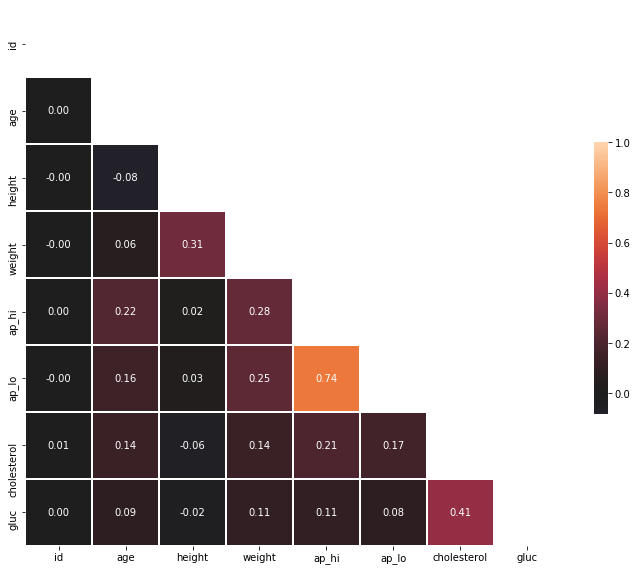

In [81]:
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
      square=True, linewidths=.5, cbar_kws={"shrink": .5});

ap_hi and ap_lo have the highest spearman's correlation 

 Why does these features have strong rank correlation?

 At what age does the number of people with CVD outnumber the number of people without CVD for the first time?

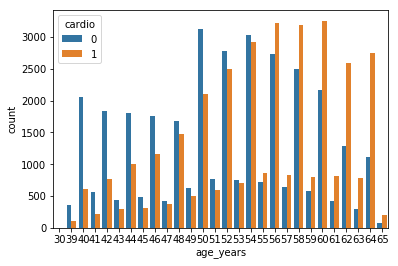

In [82]:
sns.countplot(x="age_years", hue='cardio', data=df);

55